In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from keras.layers import *
from keras.models import Model, Sequential

2024-07-08 00:19:49.418701: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 00:19:49.418740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 00:19:49.419862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 00:19:49.425542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 00:19:50.089814: W tensorflow/compiler/tf2

In [2]:
dataset = pd.read_csv("../dataset/learning-agency-lab-automated-essay-scoring-2/train.csv")

## Base Info

In [3]:
dataset.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [4]:
dataset.dtypes

essay_id     object
full_text    object
score         int64
dtype: object

In [5]:
dataset.isna().sum()

essay_id     0
full_text    0
score        0
dtype: int64

In [6]:
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset.full_text = dataset.full_text.replace("[^a-zA-Z0-9 ]", "",regex=True)

In [8]:
dataset.full_text

0        Many people have car where they live The thing...
1        I am a scientist at NASA that is discussing th...
2        People always wish they had the same technolog...
3        We all heard about Venus the planet without al...
4        Dear State SenatorThis is a letter to argue in...
                               ...                        
17302    the story  The Challenge of Exploing Venus  is...
17303    Technology has changed a lot of ways that we l...
17304    If you dont like sitting around all day than i...
17305    In The Challenge of Exporing Venus the author ...
17306    Venus is worthy place to study but dangerous T...
Name: full_text, Length: 17307, dtype: object

In [9]:
tokenizer = Tokenizer(num_words=10000)

In [10]:
def apply_func(x):
    splitted = x.split()
    return len(splitted)

In [11]:
# create a column words counts
dataset["word_num"] = dataset.full_text.apply(apply_func)

## EDA

In [12]:
dataset.describe()

,score,word_num
count,17307.000000,17307.000000
mean,2.948402,363.600335
std,1.044899,149.256544
min,1.000000,142.000000
25%,2.000000,250.000000
50%,3.000000,340.000000
75%,4.000000,446.000000
max,6.000000,1656.000000


In [13]:
dataset

,essay_id,full_text,score,word_num
0,000d118,Many people have car where they live The thing...,3,493
1,000fe60,I am a scientist at NASA that is discussing th...,3,328
2,001ab80,People always wish they had the same technolog...,4,547
3,001bdc0,We all heard about Venus the planet without al...,4,445
4,002ba53,Dear State SenatorThis is a letter to argue in...,3,368
...,...,...,...,...
17302,ffd378d,the story The Challenge of Exploing Venus is...,2,153
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,574
17304,fff016d,If you dont like sitting around all day than i...,2,213
17305,fffb49b,In The Challenge of Exporing Venus the author ...,1,230


<Axes: xlabel='score', ylabel='count'>

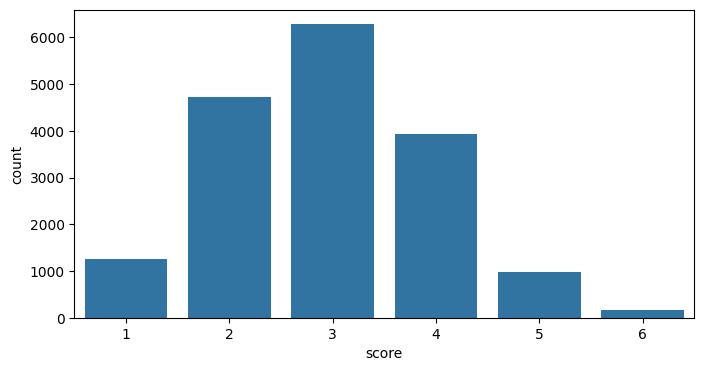

In [14]:
# countplot
plt.figure(figsize=(8,4))
sns.countplot(data=dataset, x="score")

<Axes: xlabel='score', ylabel='word_num'>

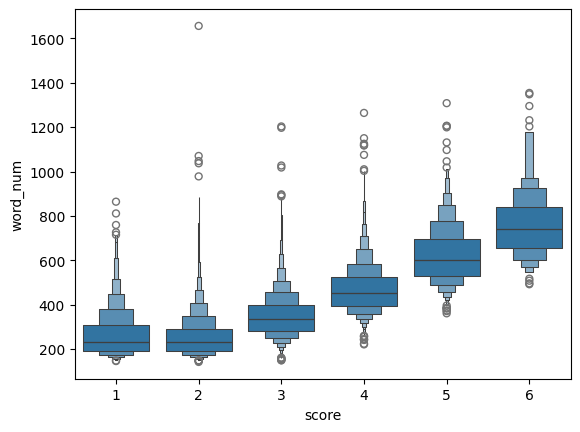

In [15]:
sns.boxenplot(data=dataset, x="score", y="word_num")

<Axes: xlabel='score', ylabel='word_num'>

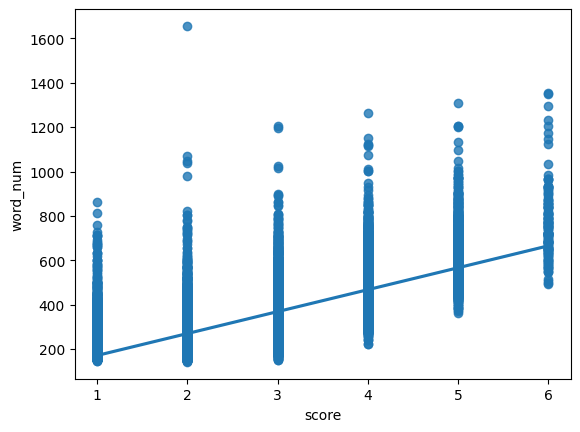

In [16]:
sns.regplot(data=dataset, x="score", y="word_num")

In [17]:
data = dataset.copy()

In [18]:
# get %99 of data
data = data.sort_values(by="word_num", ascending=False)

In [19]:
ninety_nine = round(len(data) * 0.01)

In [20]:
ninety_nine

173

In [21]:
data = data.iloc[ninety_nine:, :]

In [22]:
data

,essay_id,full_text,score,word_num
1958,1dd6a58,How do we know if are feeling are real or not ...,4,818
8241,7af9f3a,The Mona Lisa is an old painting Painted in th...,4,817
1621,1911daf,Cars have always been apart of American cultur...,5,816
15051,dd852e1,Do you believe that NASA is with holding infor...,6,814
2550,26479a8,After the nice relaxed weekend at the beach St...,6,814
...,...,...,...,...
11656,ab47cd1,Why do you think ther is a face on Red Planet ...,2,148
16088,ed209df,Aliens had nothing to do with the face on Mars...,2,148
12951,be81f6d,You should be a Seagoing CowboyIt is fun but t...,2,148
913,0e8c167,Dear SenatorDo you really think the electoral ...,1,146


In [23]:
data = data.sort_index()

In [24]:
data

,essay_id,full_text,score,word_num
0,000d118,Many people have car where they live The thing...,3,493
1,000fe60,I am a scientist at NASA that is discussing th...,3,328
2,001ab80,People always wish they had the same technolog...,4,547
3,001bdc0,We all heard about Venus the planet without al...,4,445
4,002ba53,Dear State SenatorThis is a letter to argue in...,3,368
...,...,...,...,...
17302,ffd378d,the story The Challenge of Exploing Venus is...,2,153
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,574
17304,fff016d,If you dont like sitting around all day than i...,2,213
17305,fffb49b,In The Challenge of Exporing Venus the author ...,1,230


In [25]:
data = data.reset_index()

In [26]:
data

,index,essay_id,full_text,score,word_num
0,0,000d118,Many people have car where they live The thing...,3,493
1,1,000fe60,I am a scientist at NASA that is discussing th...,3,328
2,2,001ab80,People always wish they had the same technolog...,4,547
3,3,001bdc0,We all heard about Venus the planet without al...,4,445
4,4,002ba53,Dear State SenatorThis is a letter to argue in...,3,368
...,...,...,...,...,...
17129,17302,ffd378d,the story The Challenge of Exploing Venus is...,2,153
17130,17303,ffddf1f,Technology has changed a lot of ways that we l...,4,574
17131,17304,fff016d,If you dont like sitting around all day than i...,2,213
17132,17305,fffb49b,In The Challenge of Exporing Venus the author ...,1,230


In [27]:
data.drop("index", axis=1, inplace=True)

In [28]:
data.head()

,essay_id,full_text,score,word_num
0,000d118,Many people have car where they live The thing...,3,493
1,000fe60,I am a scientist at NASA that is discussing th...,3,328
2,001ab80,People always wish they had the same technolog...,4,547
3,001bdc0,We all heard about Venus the planet without al...,4,445
4,002ba53,Dear State SenatorThis is a letter to argue in...,3,368


<Axes: xlabel='score', ylabel='word_num'>

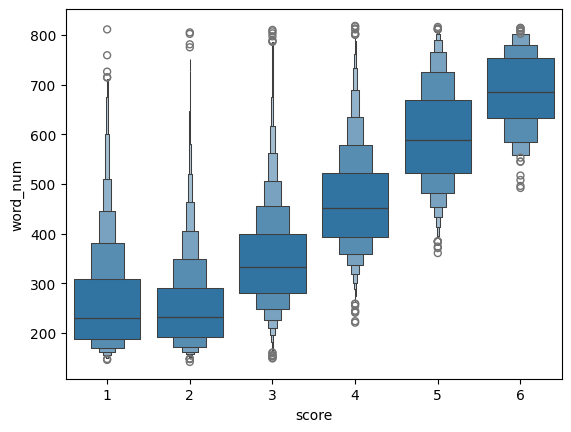

In [29]:
sns.boxenplot(data=data, x="score", y="word_num")

<Axes: xlabel='score', ylabel='word_num'>

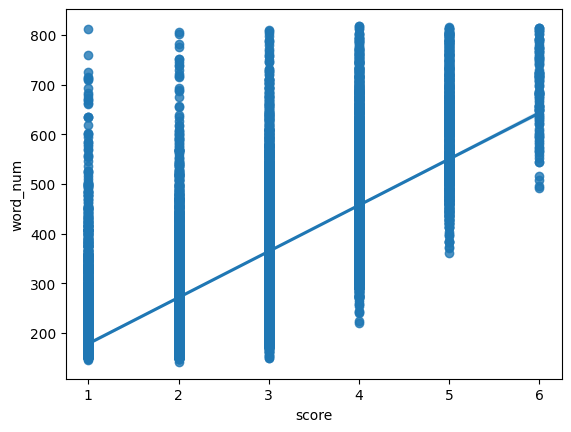

In [30]:
sns.regplot(data=data, x="score", y="word_num")

 ## PREPROCESSİNG

## TEXTS DATA

In [31]:
texts = data.full_text.values

In [32]:
tokenizer.fit_on_texts(texts)

In [33]:
df =data.copy()

In [34]:
texts = tokenizer.texts_to_sequences(df.full_text.values)

In [35]:
max_len = max([len(i) for i in texts]) 

In [36]:
max_len

804

In [37]:
from keras.utils import pad_sequences

In [38]:
padded = pad_sequences(texts, maxlen=max_len, padding="post")

# X-Y

In [39]:
y = to_categorical(df.score.values, num_classes=7)

In [40]:
scaler = MinMaxScaler()

In [41]:
X = scaler.fit_transform([df.word_num.values])

In [42]:
X = X.reshape(-1, 1)

In [43]:
y.shape, X.shape

((17134, 7), (17134, 1))

## MODEL

In [44]:
def create_model():
    input_lstm = Input(shape=(max_len,))
    text_ai_input = Embedding(input_dim=10000, input_length=max_len, output_dim=128)(input_lstm)
    text_ai_lstm_1 = LSTM(128, return_sequences=True)(text_ai_input)
    text_ai_dr1 = Dropout(0.3)(text_ai_lstm_1)
    text_ai_lstm2 = LSTM(128)(text_ai_dr1)
    text_ai_dr2 = Dropout(0.2)(text_ai_lstm2)
    text_ai_dense = Dense(128, activation="relu")(text_ai_dr2)

    # linear model
    linear_model_input = Input(shape=(1, ))
    linear_model_dense = Dense(128, activation="relu")(linear_model_input)
    linear_model_dr = Dropout(0.2)(linear_model_dense)
    linear_model_dense2 = Dense(128, activation="relu")(linear_model_dr)
    linear_model_dr2 = Dropout(0.2)(linear_model_dense2)
    linear_model_dense3 = Dense(128, activation="relu")(linear_model_dr2)

    concated_layer = Concatenate()([text_ai_dense, linear_model_dense3])
    concated_dense = Dense(256, activation="relu")(concated_layer)
    concated_dr = Dropout(0.2)(concated_dense)
    concated_dense2 = Dense(128)(concated_dr)
    out = Dense(7, activation="softmax")(concated_dense2)

    model = Model(inputs=[input_lstm, linear_model_input], outputs=out)
    model.summary()
    return model
    

In [45]:
model = create_model()

2024-07-08 00:19:57.391751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-08 00:19:57.424821: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-08 00:19:57.425079: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 804)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 804, 128)             1280000   ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 804, 128)             131584    ['embedding[0][0]']           
                                                                                              

In [46]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
txt_train, txt_test, X_train, X_test, y_train, y_test = train_test_split(padded, X, y, train_size=0.8, random_state=42)

In [49]:
txt_train.shape, X_train.shape, y_test.shape

((13707, 804), (13707, 1), (3427, 7))

In [50]:
from keras.callbacks import ModelCheckpoint

In [51]:
cp = ModelCheckpoint(filepath="essay", save_best_only=True, mode="min", monitor="val_loss")

In [52]:
model.fit([txt_train, X_train], y_train, epochs=100, validation_data=([txt_test,X_test], y_test), callbacks=[cp])

Epoch 1/100


2024-07-08 00:20:00.178171: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-07-08 00:20:00.714647: I external/local_xla/xla/service/service.cc:168] XLA service 0x74fd9cec1250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-08 00:20:00.714670: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-07-08 00:20:00.718846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1720387200.794942  114966 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


429/429 [==============================] - ETA: 0s - loss: 1.4605 - accuracy: 0.3592INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 41s 88ms/step - loss: 1.4605 - accuracy: 0.3592 - val_loss: 1.4447 - val_accuracy: 0.3630
Epoch 2/100
429/429 [==============================] - ETA: 0s - loss: 1.4466 - accuracy: 0.3635INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 28s 65ms/step - loss: 1.4466 - accuracy: 0.3635 - val_loss: 1.4378 - val_accuracy: 0.3630
Epoch 3/100
429/429 [==============================] - ETA: 0s - loss: 1.4423 - accuracy: 0.3663INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 25s 59ms/step - loss: 1.4423 - accuracy: 0.3663 - val_loss: 1.4373 - val_accuracy: 0.3630
Epoch 4/100
429/429 [==============================] - ETA: 0s - loss: 1.4432 - accuracy: 0.3668INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 24s 56ms/step - loss: 1.4432 - accuracy: 0.3668 - val_loss: 1.4356 - val_accuracy: 0.3630
Epoch 5/100
429/429 [==============================] - 21s 49ms/step - loss: 1.4423 - accuracy: 0.3666 - val_loss: 1.4383 - val_accuracy: 0.3630
Epoch 6/100
429/429 [==============================] - ETA: 0s - loss: 1.4414 - accuracy: 0.3667INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 24s 56ms/step - loss: 1.4414 - accuracy: 0.3667 - val_loss: 1.4348 - val_accuracy: 0.3630
Epoch 7/100
429/429 [==============================] - ETA: 0s - loss: 1.4416 - accuracy: 0.3667INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 24s 56ms/step - loss: 1.4416 - accuracy: 0.3667 - val_loss: 1.4336 - val_accuracy: 0.3630
Epoch 8/100
429/429 [==============================] - ETA: 0s - loss: 1.4330 - accuracy: 0.3688INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 23s 54ms/step - loss: 1.4330 - accuracy: 0.3688 - val_loss: 1.4065 - val_accuracy: 0.3691
Epoch 9/100
429/429 [==============================] - ETA: 0s - loss: 1.2327 - accuracy: 0.4599INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 24s 55ms/step - loss: 1.2327 - accuracy: 0.4599 - val_loss: 1.0717 - val_accuracy: 0.5436
Epoch 10/100
429/429 [==============================] - ETA: 0s - loss: 1.0518 - accuracy: 0.5483INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 23s 55ms/step - loss: 1.0518 - accuracy: 0.5483 - val_loss: 1.0493 - val_accuracy: 0.5308
Epoch 11/100
429/429 [==============================] - ETA: 0s - loss: 0.9757 - accuracy: 0.5820INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 23s 54ms/step - loss: 0.9757 - accuracy: 0.5820 - val_loss: 0.9689 - val_accuracy: 0.5772
Epoch 12/100
429/429 [==============================] - 20s 46ms/step - loss: 0.9394 - accuracy: 0.6020 - val_loss: 1.0150 - val_accuracy: 0.5527
Epoch 13/100
429/429 [==============================] - ETA: 0s - loss: 0.8967 - accuracy: 0.6191INFO:tensorflow:Assets written to: essay/assets


INFO:tensorflow:Assets written to: essay/assets


429/429 [==============================] - 23s 54ms/step - loss: 0.8967 - accuracy: 0.6191 - val_loss: 0.9515 - val_accuracy: 0.5865
Epoch 14/100
429/429 [==============================] - 20s 46ms/step - loss: 0.8661 - accuracy: 0.6338 - val_loss: 0.9573 - val_accuracy: 0.5681
Epoch 15/100
429/429 [==============================] - 20s 46ms/step - loss: 0.8430 - accuracy: 0.6420 - val_loss: 1.0470 - val_accuracy: 0.5652
Epoch 16/100
429/429 [==============================] - 20s 46ms/step - loss: 0.8212 - accuracy: 0.6538 - val_loss: 0.9835 - val_accuracy: 0.5856
Epoch 17/100
429/429 [==============================] - 20s 46ms/step - loss: 0.8024 - accuracy: 0.6683 - val_loss: 0.9948 - val_accuracy: 0.5667
Epoch 18/100
429/429 [==============================] - 20s 46ms/step - loss: 0.7716 - accuracy: 0.6855 - val_loss: 0.9776 - val_accuracy: 0.5935
Epoch 19/100
429/429 [==============================] - 20s 46ms/step - loss: 0.7532 - accuracy: 0.6945 - val_loss: 0.9658 - val_accuracy

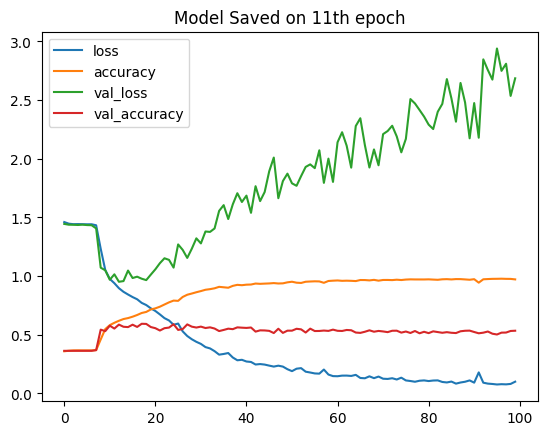

In [55]:
h = model.history
history_df = pd.DataFrame(h.history).plot(title="Model Saved on 11th epoch")

In [ ]:
## REMEMBER
# SAve tokenizer
# save minmaxscaler
# save model